<a href="https://colab.research.google.com/github/mralamdari/Machine_Learning_Projects/blob/main/Digit_Classifier_with_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Approch

In [3]:
import numpy as np

import sklearn
from sklearn import datasets
from sklearn import ensemble
from sklearn import model_selection

import matplotlib.pyplot as plt

In [4]:
mnist = datasets.fetch_openml('mnist_784', version=1)

In [9]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [5]:
x, y = mnist.data, mnist.target

In [23]:
X = np.nan_to_num(x, copy=True)
X.shape

(70000, 784)

In [29]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, random_state=77, test_size=0.2)

In [30]:
def standardization(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

In [ ]:
x_train_std = standardization(x_train)
x_test_std  = standardization(x_test)

In [57]:
x_train = np.nan_to_num(x_train_std)
x_test  = np.nan_to_num(x_test_std)

In [36]:
clf = sklearn.ensemble.RandomForestClassifier()

In [37]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
pred = clf.predict(x_test)

In [51]:
score= sklearn.metrics.accuracy_score(y_test, pred)

In [52]:
print(f'The Validation Score: %{100*score:.2f}')

The Validation Score: %96.41


'8'

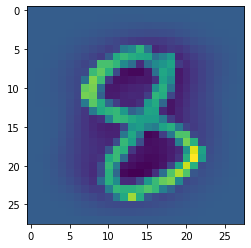

In [82]:
b=344
s = x_test[b]
# 784 = 28 * 28

# rand_ind = np.random.randint(0, len(x_test), 16)

# for r in rand_ind:
#   print(f'Picture {r}, label: {y_test.values[r]}, Pred: {pred[r]}')
    pl

# np.array(s)

s1=s.reshape(28, 28)

plt.imshow(s1)
y_test.values[b]

In [84]:
fig, axs = plt.subplot(4, 4, figsize=(20, 20))
plt.gray()

for i, ax in enumerate(axs.flat):
  for r in rand_ind:
    ax.set_title(y_test.values[r])
    ax.matshow(x_test[0].reshape(28, 28))
    ax.axis('off')

fig.show()    

ValueError: ignored

<Figure size 432x288 with 0 Axes>

# Deep Learning Approch

In [ ]:
import torch
import torchvision

In [ ]:
input_size=784     # Each Image has 784 features(pixels)
out_size=10        # 10 Numbers
epochs=10          # Iterations   
batch_size=100     
learning_rate=0.001 

In [ ]:
mean_gray = 0.1307
std_grey  = 0.3081

transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                             torchvision.transforms.Normalize((mean_gray, ), (std_grey, ))])

In [ ]:
train_ds = torchvision.datasets.MNIST(root='/data',
                                      train = True,
                                      transform = torchvision.transforms.ToTensor(),
                                      download=True)

In [ ]:
test_ds = torchvision.datasets.MNIST(root='/data',
                                      train=False,
                                      transform = torchvision.transforms.ToTensor(),
                                      download=True)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_ds,
                                           batch_size=batch_size,
                                           shuffle=True)

In [ ]:
test_loader = torch.utils.data.DataLoader(test_ds, 
                                          batch_size=batch_size,
                                          shuffle=False)

In [ ]:
class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
    self.batchnorm1 = torch.nn.BatchNorm2d(8)
    self.relu = torch.nn.ReLU()
    self.maxpool = torch.nn.MaxPool2d(kernel_size=2)
    self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
    self.batchnorm2 = torch.nn.BatchNorm2d(32)
    self.fc1 = torch.nn.Linear(32*7*7, 600)
    self.dropout = torch.nn.Dropout(p=0.5)
    self.fc2 = torch.nn.Linear(600, 100)

  def forward(self, x):
    out = self.conv1(x)
    out = self.batchnorm1(out)
    out = self.relu(out)  
    out = self.maxpool(out)
    out = self.conv2(out)
    out = self.batchnorm2(out)
    out = self.relu(out)
    out = self.maxpool(out)

    out = out.view(-1, 1568)

    out = self.fc1(out)
    out = self.dropout(out)
    out = self.fc2(out)
    return out

In [ ]:
model = Net()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs=20
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

for epoch in range(num_epochs):
  correct = 0
  iterations = 0
  iter_loss = 0.0

  model.train()
  for i, (inputs, labels) in enumerate(train_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    iter_loss += loss.item()
    optimizer.zero_grad() 
    loss.backward()
    optimizer.step()

    _, pred = torch.max(outputs, 1)
    correct += (pred == labels).sum().item()
    iterations += 1
  
  train_loss.append(iter_loss/iterations)
  train_accuracy.append(100 * correct/ len(train_ds))
  
  t_loss = 0.0
  correct = 0
  iterations = 0
  model.eval()
  for i, (inputs, labels) in enumerate(test_loader):
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    t_loss += loss.item()
    _, pred = torch.max(outputs, 1) #(100, 10)  ==> 10 is in index 1
    correct += (pred == labels).sum().item()
    iterations += 1

    test_loss.append(t_loss/iterations)
    test_accuracy.append(100*correct/len(test_ds))


  print(f'epoch: {epoch}, Training Loss: {train_loss[-1]:.3f}, Training Accuracy: %{train_accuracy[-1]:.3f}, Test Loss: {test_loss[-1]:.3f}, Test Accuracy:% {test_accuracy[-1]:.3f}')

epoch: 0, Training Loss: 0.119, Training Accuracy: %97.508, Test Loss: 0.131, Test Accuracy:% 97.760
epoch: 1, Training Loss: 0.110, Training Accuracy: %97.672, Test Loss: 0.106, Test Accuracy:% 97.330
epoch: 2, Training Loss: 0.109, Training Accuracy: %97.673, Test Loss: 0.086, Test Accuracy:% 98.390
epoch: 3, Training Loss: 0.115, Training Accuracy: %97.658, Test Loss: 0.145, Test Accuracy:% 97.490
epoch: 4, Training Loss: 0.121, Training Accuracy: %97.523, Test Loss: 0.110, Test Accuracy:% 97.910
epoch: 5, Training Loss: 0.102, Training Accuracy: %97.762, Test Loss: 0.114, Test Accuracy:% 97.890
epoch: 6, Training Loss: 0.112, Training Accuracy: %97.652, Test Loss: 0.096, Test Accuracy:% 97.720
epoch: 7, Training Loss: 0.115, Training Accuracy: %97.557, Test Loss: 0.095, Test Accuracy:% 97.620
epoch: 8, Training Loss: 0.121, Training Accuracy: %97.507, Test Loss: 0.109, Test Accuracy:% 98.030
epoch: 9, Training Loss: 0.117, Training Accuracy: %97.625, Test Loss: 0.144, Test Accuracy

In [86]:
# fig, axs = plt.subplots(6, 6, figsize = (20, 20))
# plt.gray()

# # loop through subplots and add centroid images
# for i, ax in enumerate(axs.flat):
    
#     # determine inferred label using cluster_labels dictionary
#     for key, value in cluster_labels.items():
#         if i in value:
#             ax.set_title('Inferred Label: {}'.format(key))
    
#     # add image to subplot
#     ax.matshow(images[i])
#     ax.axis('off')
    
# # display the figure
# fig.show()